# Config

In [2]:
#editamos el path para poder accedera las funciones con la estructura actual de carpetas
from sys import path
import os
path.append(os.path.realpath('../'))

In [3]:
#importamos las funciones que hemos creado nosotros
from utils import functions as func

In [4]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

import folium
import plotly.express as px

In [5]:
# Leemos los ficheros
ruta = '../data/'

df_calendar = pd.read_csv(ruta+'daily_calendar_with_events.csv')
df_sales = pd.read_csv(ruta+'item_sales.csv')
df_prices = pd.read_csv(ruta+'item_prices.csv')

# Datasets info

In [6]:
df_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [7]:
df_calendar.value_counts()

date        weekday    weekday_int  d       event         
2011-02-06  Sunday     2            d_9     SuperBowl         1
2011-08-01  Monday     3            d_185   Ramadan starts    1
2016-02-07  Sunday     2            d_1836  SuperBowl         1
2016-01-01  Friday     7            d_1799  NewYear           1
2015-11-26  Thursday   6            d_1763  Thanksgiving      1
2015-06-18  Thursday   6            d_1602  Ramadan starts    1
2015-04-05  Sunday     2            d_1528  Easter            1
2015-02-01  Sunday     2            d_1465  SuperBowl         1
2015-01-01  Thursday   6            d_1434  NewYear           1
2014-11-27  Thursday   6            d_1399  Thanksgiving      1
2014-06-29  Sunday     2            d_1248  Ramadan starts    1
2014-04-20  Sunday     2            d_1178  Easter            1
2014-02-02  Sunday     2            d_1101  SuperBowl         1
2014-01-01  Wednesday  5            d_1069  NewYear           1
2013-11-28  Thursday   6            d_1035  T

In [8]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [9]:
df_sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [10]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


In [11]:
df_prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


# Data analysis

<Axes: >

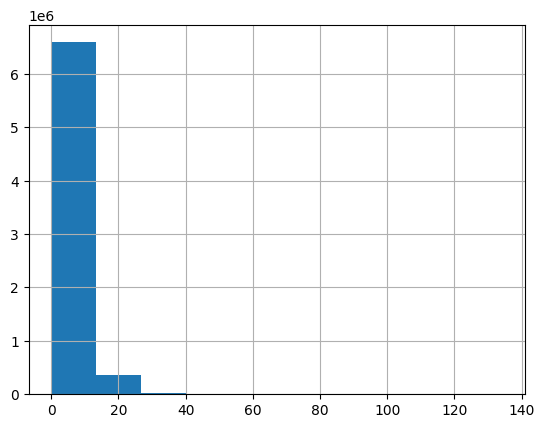

In [12]:
df_prices['sell_price'].hist()

In [13]:
df_prices_1 = df_prices['sell_price'] > 130

In [14]:
df_prices_2 = df_prices[df_prices['sell_price'] > 80]

In [15]:
df_price3 = df_prices[df_prices['item']=='HOME_&_GARDEN_2_406']

In [16]:
df_price3['sell_price'].describe()

count    2867.000000
mean       16.066864
std         6.040927
min         4.075000
25%        15.575000
50%        15.575000
75%        15.587500
max       134.150000
Name: sell_price, dtype: float64

In [17]:
df_prices_4 = df_prices[df_prices['sell_price'] <1]

<Axes: >

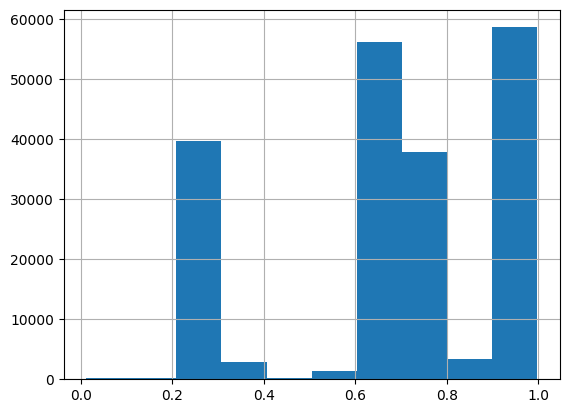

In [18]:
df_prices_4['sell_price'].hist()

In [19]:
df_prices_1.value_counts()

sell_price
False    6965703
True           3
Name: count, dtype: int64

In [20]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [21]:
# Cogemos las columnas.
columnas = df_sales.columns
list_id_vars = columnas[:7]   # son las columnas que necesitamos mantener.
list_value_vars = columnas[7:]

In [22]:
# Codigo para trasponer columnas a filas.
df_daily_sales = pd.melt(df_sales, id_vars=list_id_vars,
                   value_vars=list_value_vars ,
                   var_name='d', value_name='sales')

In [23]:
df_daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id          object
 1   item        object
 2   category    object
 3   department  object
 4   store       object
 5   store_code  object
 6   region      object
 7   d           object
 8   sales       int64 
dtypes: int64(1), object(8)
memory usage: 3.9+ GB


In [24]:
df_daily_sales.head()

,id,item,category,department,store,store_code,region,d,sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0


In [25]:
df_daily_sales.isnull().sum()

id            0
item          0
category      0
department    0
store         0
store_code    0
region        0
d             0
sales         0
dtype: int64

In [26]:
df_prices.isnull().sum()

item               0
category           0
store_code         0
yearweek      243920
sell_price         0
dtype: int64

In [27]:
df_prices[df_prices['yearweek'].isnull()]

,item,category,store_code,yearweek,sell_price
149,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
...,...,...,...,...,...
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000


In [28]:
df_prices.value_counts()

item                 category       store_code  yearweek  sell_price
ACCESORIES_1_001     ACCESORIES     BOS_1       201328.0  12.7414       1
SUPERMARKET_2_184    SUPERMARKET    PHI_1       201450.0  5.9760        1
                                                201507.0  5.9760        1
                                                201506.0  5.9760        1
                                                201505.0  5.9760        1
                                                                       ..
HOME_&_GARDEN_1_466  HOME_&_GARDEN  BOS_2       201451.0  4.9500        1
                                                201450.0  4.9500        1
                                                201449.0  4.9500        1
                                                201448.0  4.9500        1
SUPERMARKET_3_827    SUPERMARKET    PHI_3       201617.0  1.2000        1
Name: count, Length: 6721786, dtype: int64

In [30]:
df_prices['sell_price'].describe()

count    6.965706e+06
mean     5.518273e+00
std      4.387861e+00
min      1.200000e-02
25%      2.620100e+00
50%      4.200000e+00
75%      7.176000e+00
max      1.341500e+02
Name: sell_price, dtype: float64